In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [2]:
data = pd.read_csv('COPP TRAIN.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,"Mar 24, 2022",114.47,116.64,110.61,112.34,112.34,"3,07,238"
1,"Mar 23, 2022",108.85,115.40,108.38,114.93,114.93,"2,89,182"
2,"Mar 22, 2022",112.90,115.01,109.30,111.76,111.76,"3,18,629"
3,"Mar 21, 2022",105.13,112.69,104.08,112.12,112.12,"77,217"
4,"Mar 18, 2022",103.62,106.28,102.30,104.70,104.70,"74,247"


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       165 non-null    object 
 1   Open       165 non-null    float64
 2   High       165 non-null    float64
 3   Low        165 non-null    float64
 4   Close      165 non-null    float64
 5   Adj Close  165 non-null    float64
 6   Volume     165 non-null    object 
dtypes: float64(5), object(2)
memory usage: 9.1+ KB


In [4]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 164
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       165 non-null    object 
 1   Open       165 non-null    float64
 2   High       165 non-null    float64
 3   Low        165 non-null    float64
 4   Close      165 non-null    float64
 5   Adj Close  165 non-null    float64
 6   Volume     165 non-null    object 
dtypes: float64(5), object(2)
memory usage: 10.3+ KB


In [6]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(165, 1)

In [7]:
X_train = []
y_train = []

for i in range (60,165): 
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [8]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(105, 60, 1)

In [9]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [10]:
hist = model.fit(X_train, y_train, epochs = 70, batch_size = 32, verbose=2)

Epoch 1/70
4/4 - 6s - loss: 0.0248 - 6s/epoch - 1s/step
Epoch 2/70
4/4 - 1s - loss: 0.0108 - 543ms/epoch - 136ms/step
Epoch 3/70
4/4 - 1s - loss: 0.0102 - 571ms/epoch - 143ms/step
Epoch 4/70
4/4 - 1s - loss: 0.0093 - 571ms/epoch - 143ms/step
Epoch 5/70
4/4 - 1s - loss: 0.0072 - 587ms/epoch - 147ms/step
Epoch 6/70
4/4 - 1s - loss: 0.0081 - 573ms/epoch - 143ms/step
Epoch 7/70
4/4 - 1s - loss: 0.0067 - 570ms/epoch - 142ms/step
Epoch 8/70
4/4 - 1s - loss: 0.0063 - 589ms/epoch - 147ms/step
Epoch 9/70
4/4 - 1s - loss: 0.0057 - 593ms/epoch - 148ms/step
Epoch 10/70
4/4 - 1s - loss: 0.0043 - 604ms/epoch - 151ms/step
Epoch 11/70
4/4 - 1s - loss: 0.0039 - 617ms/epoch - 154ms/step
Epoch 12/70
4/4 - 1s - loss: 0.0032 - 569ms/epoch - 142ms/step
Epoch 13/70
4/4 - 1s - loss: 0.0030 - 556ms/epoch - 139ms/step
Epoch 14/70
4/4 - 1s - loss: 0.0031 - 582ms/epoch - 146ms/step
Epoch 15/70
4/4 - 1s - loss: 0.0031 - 560ms/epoch - 140ms/step
Epoch 16/70
4/4 - 1s - loss: 0.0029 - 548ms/epoch - 137ms/step
Epoch 1

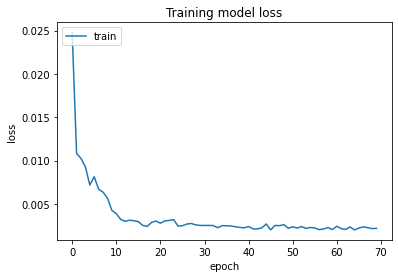

In [11]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [12]:
testData = pd.read_csv('COPP TEST.csv')

testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 

#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60

for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(11, 60, 1)

In [13]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 1s 1s/step


array([[0.4081177 ],
       [0.40449452],
       [0.39947373],
       [0.39466447],
       [0.39078733],
       [0.3882322 ],
       [0.3882421 ],
       [0.39119312],
       [0.3970106 ],
       [0.4064731 ],
       [0.41342375]], dtype=float32)

In [14]:
predicted_price = sc.inverse_transform(y_pred)

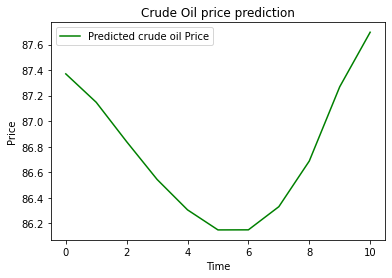

In [15]:
plt.plot(predicted_price, color = 'green', label = 'Predicted crude oil Price')
plt.title('Crude Oil price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [16]:
print(predicted_price)

[[87.37026 ]
 [87.14787 ]
 [86.8397  ]
 [86.5445  ]
 [86.306526]
 [86.1497  ]
 [86.15031 ]
 [86.331436]
 [86.68851 ]
 [87.26932 ]
 [87.69595 ]]
